# US Home Price Analysis
### Life cycle of US Home Price Analysis Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
#### 1) Problem statement
* This project understands and the Find publicly available data for key **supply-demand** factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.
#### 2) Data Collection
* The data consists of 13 column and 5000 rows.
#### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df =pd.read_csv(r"C:\US-House-Analysis\notebook\data\US_House_Price.csv")

#### Show Top 5 Records

In [11]:
df.select_dtypes(include="object").columns

Index(['Date', 'State', 'Land_Availability', 'Economic_Conditions',
       'Consumer_Confidence', 'Demographic_Trends', 'Location', 'Amenities'],
      dtype='object')

In [4]:
df.head(5)

,Date,State,Housing_Inventory,Construction_Costs,Land_Availability,Interest_Rates,Economic_Conditions,Population_Growth,Consumer_Confidence,Demographic_Trends,House_Price,House_Area_sqft,Location,Amenities
0,01-01-2010,Pennsylvania,60777,172403,Abundant,4.08,Moderate,1.59,High,Aging Population,183909,2286,Urban,Good Schools
1,02-01-2010,Kentucky,133587,121940,Limited,5.75,Weak,1.27,High,Aging Population,320286,2222,Urban,Good Schools
2,03-01-2010,South Dakota,114584,177811,Abundant,4.46,Weak,1.79,Moderate,Millennial Buyers,774649,1709,Suburban,Transport
3,04-01-2010,Texas,73366,192099,Limited,3.28,Weak,1.78,Moderate,Millennial Buyers,300061,1001,Suburban,Transport
4,05-01-2010,Tennessee,105705,161045,Abundant,4.62,Moderate,1.58,Moderate,Aging Population,268774,2666,Suburban,Transport


In [5]:
df.describe()

,Housing_Inventory,Construction_Costs,Interest_Rates,Population_Growth,House_Price,House_Area_sqft
count,5000.000000,5000.00000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,123569.872400,149417.91820,4.507358,1.251860,4.985443e+05,2511.407200
std,43064.737015,29261.94493,0.863476,0.430632,2.395380e+05,869.131439
min,50023.000000,100018.00000,3.000000,0.500000,1.501350e+05,1000.000000
25%,86861.250000,123799.50000,3.780000,0.880000,3.122615e+05,1765.750000
50%,121774.000000,148790.00000,4.510000,1.250000,4.871920e+05,2520.500000
75%,161180.500000,174897.25000,5.250000,1.620000,6.524260e+05,3252.500000
max,199963.000000,199928.00000,6.000000,2.000000,1.995582e+06,3999.000000


In [20]:
df.select_dtypes(include='object').columns.tolist()

['State',
 'Land_Availability',
 'Economic_Conditions',
 'Consumer_Confidence',
 'Demographic_Trends',
 'Location',
 'Amenities']

#### Shape of the dataset

In [12]:
df.shape

(5000, 14)

#### 2.2 Dataset information
* Date: The chronological reference point for the dataset, essential for tracking temporal trends and making informed real estate decisions.

* State: The geographic region with in which housing data is collected, a critical factor in assessing market variations and regulatory influences.

* Housing Inventory: The quantity of available residential properties, a pivotal metric for gauging supply and demand dynamics within a housing market.

* Construction Costs: The expenses associated with building or renovating residential properties, influencing both housing supply and pricing.

* Land Availability: The extent to which land suitable for housing development is accessible, a factor that can dictate future market expansion and pricing.

* Interest Rates: The prevailing rates at which borrowers can access financing, impacting housing affordability and demand.

* Economic Conditions: The overall financial health and stability of the region, influencing job prospects and residents ability to purchase homes.

* Population Growth: The rate at which the local population is increasing or decreasing, indicative of housing demand and potential investment opportunities.

* Consumer Confidence: The sentiment among potential homebuyers, which can sway market activity and housing price trends.

* Demographic Trends: Patterns in the population's age, income, and household composition, shaping housing preferences and market demands.

* Location & Amenities: The attractiveness of a property's location and its proximity to essential amenities, influencing its desirability and value.

* House Price ($): The cost of purchasing a residential property, a fundamental indicator of market performance.

* House Area (sqft): The size of a residential property, a crucial factor affecting its market value and suitability for different buyer demographics.

#### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column
#### 3.1 Check Missing values

In [1]:
df.isna().sum()

NameError: name 'df' is not defined

Insight
- The dataset is complete with no missing values, ensuring the integrity of the data for analysis.
#### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

Insight
- No duplicated values are present in the dataset, reducing the risk of data redundancy and ensuring data consistency
#### 3.3 Check data type

In [27]:
df['Amenities'].unique()

array(['Good Schools', 'Transport'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 5000 non-null   object 
 1   Housing_Inventory     5000 non-null   int64  
 2   Construction_Costs    5000 non-null   int64  
 3   Land_Availability     5000 non-null   object 
 4   Interest_Rates        5000 non-null   float64
 5   Economic_Conditions   5000 non-null   object 
 6   Population_Growth     5000 non-null   float64
 7   Consumer_Confidence   5000 non-null   object 
 8   Demographic_Trends    5000 non-null   object 
 9   Location_&_Amenities  5000 non-null   object 
 10  House_Price_($)       5000 non-null   int64  
 11  House_Area_(sqft)     5000 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 468.9+ KB


Insights
- In the above dataset there is no null values 
- there are 3 types of datatypes object, float and int
- computers are only understanding the numbers but we have objests (or) charecters also
- These objects are converted into numbers with the help of preprocessing step.

#### 3.4 Checking the number of unique values of each column

In [ ]:
df.nunique()

State                     50
Housing_Inventory       4922
Construction_Costs      4870
Land_Availability          2
Interest_Rates           301
Economic_Conditions        3
Population_Growth        151
Consumer_Confidence        3
Demographic_Trends         2
Location_&_Amenities       2
House_Price_($)         4984
House_Area_(sqft)       2431
dtype: int64

Insights
- Geographic Diversity: The dataset covers data for 50 different states, indicating a wide geographical coverage.

- Temporal Variability: The Date column shows a wide range of unique date values, suggesting that data was collected over a significant period, potentially allowing for time-series analysis.

- Housing Inventory Spread: The Housing Inventory column contains a large number of unique values, indicating variations in housing inventory levels across different observations or regions.

- Construction Cost Range: The Construction Costs column has a diverse set of unique values, which can be useful for analyzing the cost of construction across different scenarios.

- Land Availability Categories: The Land Availability column has only 2 unique values, suggesting a binary classification for land availability, which may be valuable for assessing the impact of land availability on other factors in the dataset.

#### 3.5 Check statistics of data set

In [ ]:
df.describe()

,Housing_Inventory,Construction_Costs,Interest_Rates,Population_Growth,House_Price_($),House_Area_(sqft)
count,5000.00000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,124888.02200,149533.079800,4.501782,1.253826,4.985583e+05,2479.323200
std,43419.95989,29121.474948,0.875825,0.434276,2.379069e+05,853.296504
min,50038.00000,100012.000000,3.000000,0.500000,1.504900e+05,1000.000000
25%,87910.50000,124521.250000,3.740000,0.880000,3.231162e+05,1758.750000
50%,124298.00000,149372.500000,4.500000,1.260000,4.823635e+05,2469.500000
75%,162833.75000,174801.250000,5.250000,1.640000,6.475578e+05,3220.000000
max,199958.00000,199969.000000,6.000000,2.000000,1.999729e+06,4000.000000


Insights
Insight
* From above description of numerical data, all means are very close to each other - between 1.25 and 498000;
* All standard deviations are also close - between 0.434 and 2379069;
* While there is a minimum score 0.5 for Population Growth.
- In the 75 percentile and max value there is no vary large difference, and the outliers of the above dataset is not more then that.
- In the describe is a python function and it is used to find the descriptive statistics of the dataset
- It gives summary statistics like mean, standard deviation, minimum, maximum, quartiles, etc., for each numerical column in the DataFrame.
- These statistics help you understand the central tendency, spread, and distribution of your data

#### 3.6 Exploring Data

In [ ]:
df.head()

,State,Housing_Inventory,Construction_Costs,Land_Availability,Interest_Rates,Economic_Conditions,Population_Growth,Consumer_Confidence,Demographic_Trends,Location_&_Amenities,House_Price_($),House_Area_(sqft)
0,Georgia,131832,104114,Abundant,3.29,Weak,1.05,Low,Millennial Buyers,"Urban, Good Schools",244358,2763
1,Colorado,190652,147075,Abundant,4.81,Moderate,0.56,Low,Millennial Buyers,"Urban, Good Schools",689121,1779
2,Maine,148790,120236,Abundant,5.60,Strong,0.79,High,Millennial Buyers,"Urban, Good Schools",481104,2226
3,Washington,108619,197895,Limited,3.21,Strong,1.02,High,Millennial Buyers,"Urban, Good Schools",244898,2722
4,Rhode Island,178383,184711,Limited,5.49,Strong,1.66,Low,Aging Population,"Suburban, Transport",316555,3950


In [ ]:
print("Categories in 'State' variable:     ",end=" " )
print(df['State'].unique())

print("Categories in 'Land Availability' variable:  ",end=" ")
print(df['Land Availability'].unique())

print("Categories in'Economic Conditions' variable:",end=" " )
print(df['Economic Conditions'].unique())

print("Categories in 'Consumer Confidence' variable:     ",end=" " )
print(df['Consumer Confidence'].unique())

print("Categories in 'Demographic Trends' variable:     ",end=" " )
print(df['Demographic Trends'].unique())

print("Categories in 'Location & Amenities' variable:     ",end=" " )
print(df['Location & Amenities'].unique())

Categories in 'State' variable:      ['Georgia' 'Colorado' 'Maine' 'Washington' 'Rhode Island' 'Iowa'
 'Virginia' 'Missouri' 'New Jersey' 'New York' 'Indiana' 'West Virginia'
 'Florida' 'Mississippi' 'Montana' 'Hawaii' 'Michigan' 'Massachusetts'
 'South Carolina' 'Wyoming' 'New Hampshire' 'Connecticut' 'Arizona'
 'Louisiana' 'Alabama' 'Oregon' 'Maryland' 'New Mexico' 'Oklahoma'
 'Alaska' 'South Dakota' 'Pennsylvania' 'Kansas' 'Texas' 'North Carolina'
 'North Dakota' 'Tennessee' 'Minnesota' 'Wisconsin' 'California' 'Utah'
 'Arkansas' 'Kentucky' 'Idaho' 'Nevada' 'Delaware' 'Nebraska' 'Vermont'
 'Illinois' 'Ohio']
Categories in 'Land Availability' variable:   

KeyError: 'Land Availability'

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Housing Inventory', 'Construction Costs', 'Interest Rates', 'Population Growth', 'House Price ($)', 'House Area (sqft)']

We have 7 categorical features : ['Date', 'State', 'Land Availability', 'Economic Conditions', 'Consumer Confidence', 'Demographic Trends', 'Location & Amenities']


##### 3.7 Adding columns for "Price per Square Foot", "Mortgage Payment Estimate" and "Yearly Growth Rate"

In [ ]:
# Create a new column for Price per Sqft
df['Price per Sqft'] = df['House Price ($)'] / df['House Area (sqft)']
# Assuming you have data for interest rates and house prices
interest_rates = df['Interest Rates'] / 100  # Convert interest rates to decimal

# Calculate monthly mortgage payment
df['Monthly Mortgage Payment'] = (df['House Price ($)'] * (interest_rates / 12)) / (1 - (1 + interest_rates / 12) ** (-30 * 12))

# Assuming you have a 'Date' column as a datetime object and 'House Price ($)' column
# Sort the DataFrame by 'Date' to ensure it's in chronological order
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Calculate the yearly growth rate for rows with at least 12 months of data
df['Yearly Growth Rate'] = df.groupby('State')['House Price ($)'].pct_change(periods=12) * 100

# Fill NaN values with 0 or any other appropriate value
df['Yearly Growth Rate'].fillna(0, inplace=True)



In [ ]:
df.head()

,Date,State,Housing Inventory,Construction Costs,Land Availability,Interest Rates,Economic Conditions,Population Growth,Consumer Confidence,Demographic Trends,Location & Amenities,House Price ($),House Area (sqft),Price per Sqft,Monthly Mortgage Payment,Yearly Growth Rate
0,2010-01-01,Georgia,131832,104114,Abundant,3.29,Weak,1.05,Low,Millennial Buyers,"Urban, Good Schools",244358,2763,88.439377,1068.833336,0.0
4993,2010-01-01,Rhode Island,159091,142118,Abundant,4.89,Weak,1.22,High,Millennial Buyers,"Suburban, Transport",586469,2496,234.963542,3108.984009,0.0
1,2010-01-02,Colorado,190652,147075,Abundant,4.81,Moderate,0.56,Low,Millennial Buyers,"Urban, Good Schools",689121,1779,387.364250,3619.745695,0.0
4994,2010-01-02,Massachusetts,81954,142750,Limited,3.59,Moderate,1.84,Low,Millennial Buyers,"Urban, Good Schools",273629,3292,83.119380,1242.504458,0.0
2,2010-01-03,Maine,148790,120236,Abundant,5.60,Strong,0.79,High,Millennial Buyers,"Urban, Good Schools",481104,2226,216.129380,2761.916939,0.0


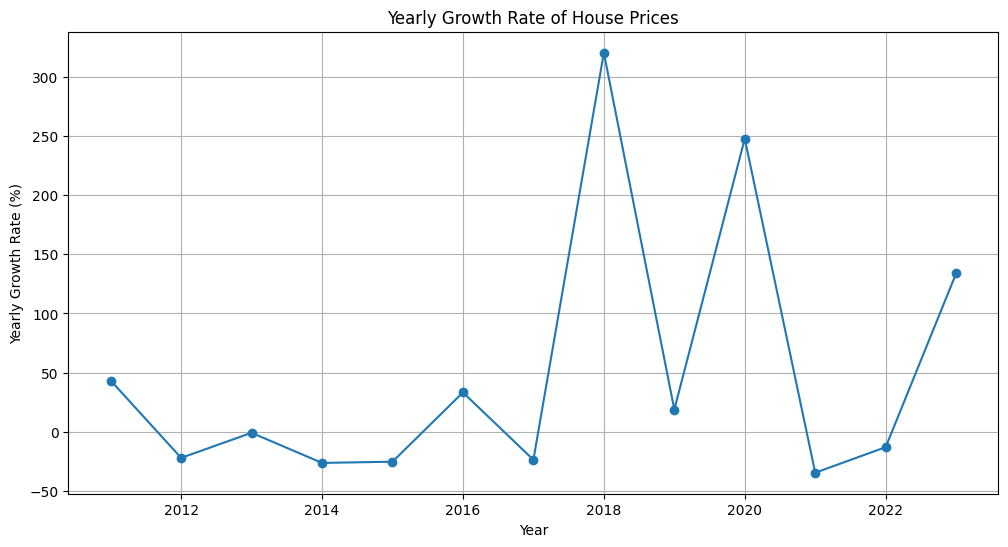

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with 'Date' and 'House Price ($)' columns
# Make sure to sort your DataFrame by 'Date' if it's not already sorted

# Convert 'Date' to a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Initialize lists to store years and corresponding growth rates
years = []
growth_rates = []

# Iterate through each year to calculate yearly growth rates
for year in range(df.index.min().year + 1, df.index.max().year + 1):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    
    # Filter data for the current year
    yearly_data = df[(df.index >= start_date) & (df.index < end_date)]
    
    # Calculate the yearly growth rate and append to lists
    if len(yearly_data) > 1:
        yearly_growth = (yearly_data['House Price ($)'].iloc[-1] - yearly_data['House Price ($)'].iloc[0]) / yearly_data['House Price ($)'].iloc[0] * 100
        years.append(year)
        growth_rates.append(yearly_growth)

# Create a DataFrame for the calculated growth rates
yearly_growth_df = pd.DataFrame({'Year': years, 'Yearly Growth Rate': growth_rates})

# Plot the yearly growth rates
plt.figure(figsize=(12, 6))
plt.plot(yearly_growth_df['Year'], yearly_growth_df['Yearly Growth Rate'], marker='o', linestyle='-')
plt.title('Yearly Growth Rate of House Prices')
plt.xlabel('Year')
plt.ylabel('Yearly Growth Rate (%)')
plt.grid(True)

# Show the plot
plt.show()
